In [1]:
!!cd

['C:\\Users\\nagal\\demo\\clustering\\agglomerative']

# Customer Segmentation Using AgglomerativeClustering

### import libraries

In [2]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
%matplotlib inline

### Load Data From CSV File

In [3]:
df = pd.read_csv("customers.csv")
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


### Pre-Processing

In [9]:
df = df.loc[:10,["Age", "Income"]]

In [11]:
df.head()

,Age,Income
0,41,19
1,47,100
2,33,57
3,29,19
4,47,253


In [14]:
# NORMALIZE DATA
from sklearn.preprocessing import scale
df["Age"] = scale(df["Age"])
df["Income"] = scale(df["Income"])
df.head()

,Age,Income
0,0.221660,-0.947359
1,1.082220,0.329641
2,-0.925755,-0.348273
3,-1.499462,-0.947359
4,1.082220,2.741751


# Modeling

In [15]:
model = AgglomerativeClustering(n_clusters = 5)
model.fit(df)
labels = model.labels_
print(labels)

[0 4 0 3 2 1 0 1 3 4 1]


# Insights

### we assign the labels to each row in dataframe

In [21]:
df["clusters"] = labels
df.head(n = 10)

,Age,Income,clusters
0,0.221660,-0.947359,0
1,1.082220,0.329641,4
2,-0.925755,-0.348273,0
3,-1.499462,-0.947359,3
4,1.082220,2.741751,2
5,0.078233,0.030098,1
6,-0.208621,-0.364038,0
7,0.365086,-0.237915,1
8,-1.929742,-0.963124,3
9,1.082220,0.566122,4


### Now, lets look at the distribution of customers based on their age and income

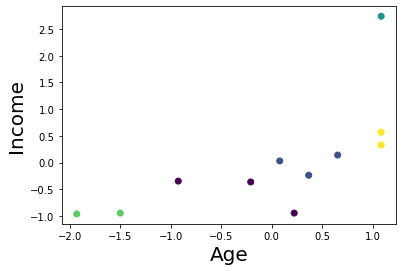

In [33]:
plt.scatter(df["Age"], df["Income"], c = labels.astype(float))
plt.xlabel("Age", fontsize = 20)
plt.ylabel("Income", fontsize = 20)
plt.show()

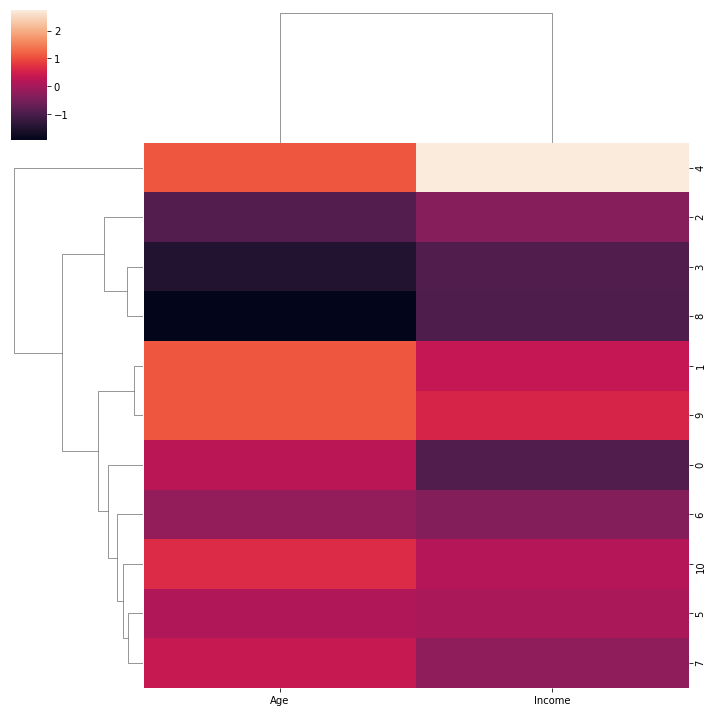

In [35]:
sns.clustermap(df[["Age", "Income"]])

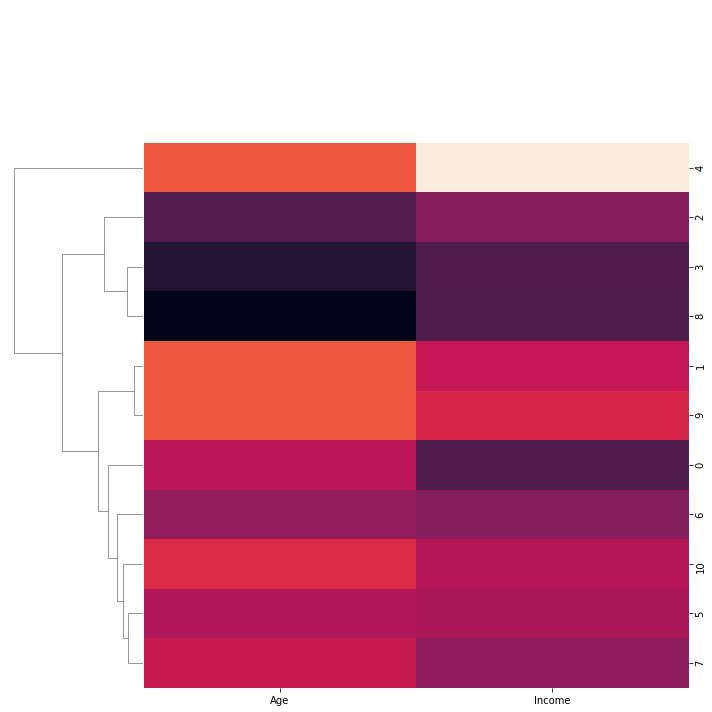

In [37]:
sns.clustermap(df[["Age", "Income"]], cbar_pos = None, col_cluster = None)

# Dendrogram using Scipy

In [38]:
from scipy.cluster.hierarchy import dendrogram, ward

In [39]:
linkage_array = ward(df)

In [40]:
linkage_array

array([[ 1.        ,  9.        ,  0.23648144,  2.        ],
       [ 5.        ,  7.        ,  0.39257551,  2.        ],
       [ 3.        ,  8.        ,  0.43056899,  2.        ],
       [10.        , 12.        ,  0.57137839,  3.        ],
       [ 2.        ,  6.        ,  0.71730705,  2.        ],
       [ 0.        , 15.        ,  1.13830373,  3.        ],
       [14.        , 16.        ,  2.2779675 ,  6.        ],
       [ 4.        , 11.        ,  3.51413137,  3.        ],
       [13.        , 17.        ,  5.40570285,  8.        ],
       [18.        , 19.        ,  6.56289503, 11.        ]])

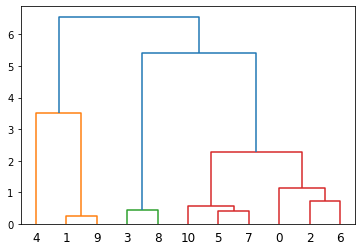

In [41]:
d = dendrogram(linkage_array)

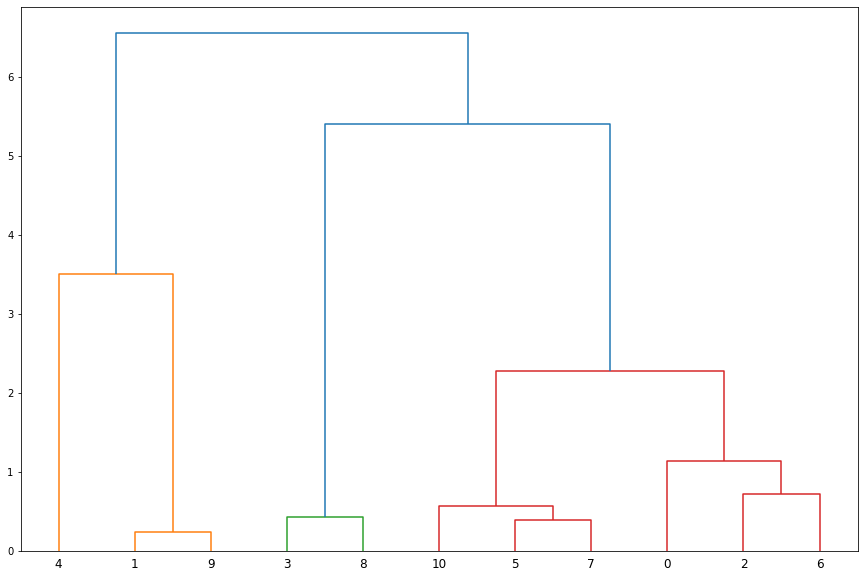

In [45]:
d = dendrogram(linkage_array)
plt.gcf().set_size_inches(15, 10)